# Problème 1
Visualiser les isothermes de Freundlich et de Langmuir

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def freundlich(C, kp, b):
    S = kp*C**b
    return(S)

def langmuir(C, Smax, kp):
    S = C*kp*Smax/(1+kp*C)
    return(S)

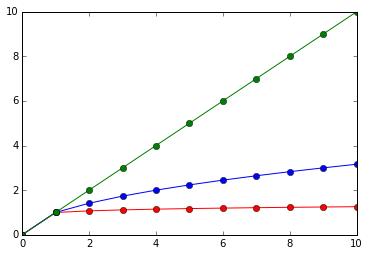

In [3]:
conc = linspace(num = 11, start = 0, stop = 10, endpoint=True)
S_freundlich1 = freundlich(C = conc, kp = 1, b = 0.1)
S_freundlich2 = freundlich(C = conc, kp = 1, b = 0.5)
S_freundlich3 = freundlich(C = conc, kp = 1, b = 1)
plot(conc, S_freundlich1, 'r-o',
    conc, S_freundlich2, 'b-o',
    conc, S_freundlich3, 'g-o')

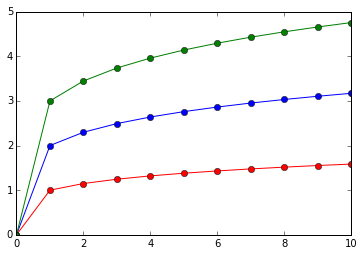

In [4]:
S_freundlich1 = freundlich(C = conc, kp = 1, b = 0.2)
S_freundlich2 = freundlich(C = conc, kp = 2, b = 0.2)
S_freundlich3 = freundlich(C = conc, kp = 3, b = 0.2)
plot(conc, S_freundlich1, 'r-o',
    conc, S_freundlich2, 'b-o',
    conc, S_freundlich3, 'g-o')

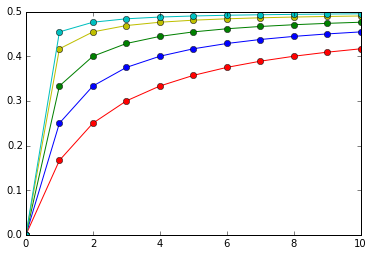

In [5]:
S_langmuir1 = langmuir(C = conc, kp = 0.5, Smax = 0.5)
S_langmuir2 = langmuir(C = conc, kp = 1, Smax = 0.5)
S_langmuir3 = langmuir(C = conc, kp = 2, Smax = 0.5)
S_langmuir4 = langmuir(C = conc, kp = 5, Smax = 0.5)
S_langmuir5 = langmuir(C = conc, kp = 10, Smax = 0.5)
plot(conc, S_langmuir1, 'r-o',
    conc, S_langmuir2, 'b-o',
    conc, S_langmuir3, 'g-o',
    conc, S_langmuir4, 'y-o',
    conc, S_langmuir5, 'c-o')

# Problème 2
Lisser des données simulées avec la fonction d'isotherme de Langmuir.

## Créer des données simulées

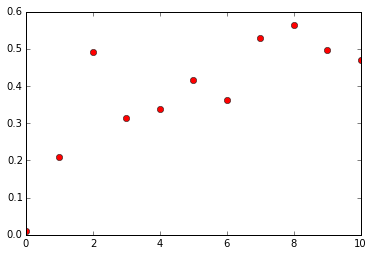

In [9]:
data = abs(S_langmuir2 + 0.08 * np.random.randn(11))
plot(conc, data, 'ro')

In [12]:
conc

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

## Lisser les données

1- Estimer des paramètres de départ

2- Lisser avec la fonciton curve_fit, incluse dans la librairie scipy, sous la section optimize

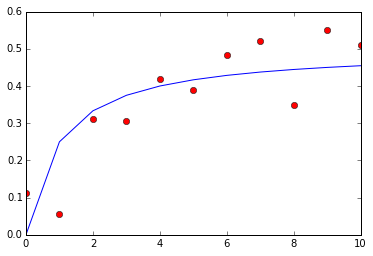

In [11]:
S_guess = langmuir(C = conc, Smax = 0.5, b = 1)
plot(conc, data, 'ro',
    conc, S_guess, 'b-')

In [22]:
from scipy.optimize import curve_fit
fit = curve_fit(langmuir, conc, data, p0=(1, 0.5))
fit

(array([ 0.60442009,  0.51786069]), array([[ 0.00613941, -0.01739753],
        [-0.01739753,  0.05777375]]))

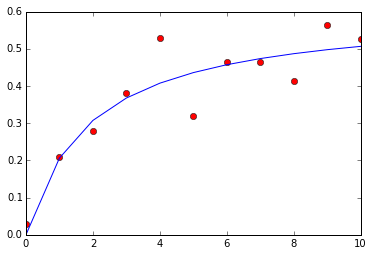

In [24]:
S_fit = langmuir(C = conc, Smax = fit[0][0], kp = fit[0][1])
plot(conc, data, 'ro',
    conc, S_fit, 'b-')